In [2]:
#--- Code for loading the data set and pre-processing --->
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import copy
from sklearn.decomposition import PCA
from sklearn.decomposition import *
from sklearn.svm import SVC
from matplotlib.pyplot import MultipleLocator
from sklearn import linear_model
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
import sys
sys.path.append("/Users/zico5288/Desktop/INFR10069-2020-CW2-main/helpers")
from iaml01cw2_helpers import load_CoVoST2
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2("/Users/zico5288/Desktop/INFR10069-2020-CW2-main/data")

/Users/zico5288/opt/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


Q3.1

In [4]:
# Q3.1
def iaml01cw2_q3_1():
    kmeans = KMeans(n_clusters=22, random_state=1).fit(Xtrn)
    print('sum of squared distances of samples to their closest cluster centre = %s'%(kmeans.inertia_))
    for i in range(22):
        print('class = %s, number of samples = %s'%(i,np.sum(kmeans.labels_== i)))
iaml01cw2_q3_1()

sum of squared distances of samples to their closest cluster centre = 38185.816951386696
class = 0, number of samples = 1018
class = 1, number of samples = 1125
class = 2, number of samples = 1191
class = 3, number of samples = 890
class = 4, number of samples = 1162
class = 5, number of samples = 1332
class = 6, number of samples = 839
class = 7, number of samples = 623
class = 8, number of samples = 1400
class = 9, number of samples = 838
class = 10, number of samples = 659
class = 11, number of samples = 1276
class = 12, number of samples = 121
class = 13, number of samples = 152
class = 14, number of samples = 950
class = 15, number of samples = 1971
class = 16, number of samples = 1251
class = 17, number of samples = 845
class = 18, number of samples = 896
class = 19, number of samples = 930
class = 20, number of samples = 1065
class = 21, number of samples = 1466


Q3.2

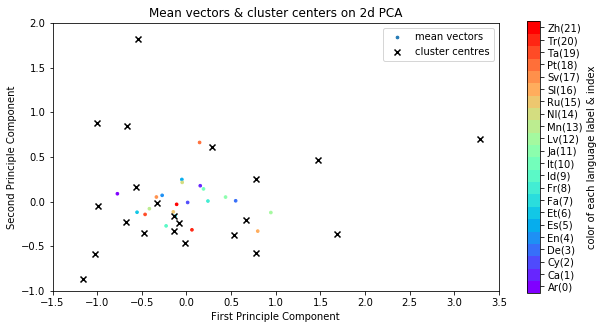

In [46]:
# Q3.2
def iaml01cw2_q3_2():
    kmeans = KMeans(n_clusters=22, random_state=1).fit(Xtrn)
    plt.figure(figsize=(10,10))
    Xmean1 = np.empty([0,2])
    Xmean2 = np.empty([0,2])
    Ymean1 = np.arange(0,22).reshape(22,)
    for i in range(22):
        Xtrn_i = np.array(Xtrn[Ytrn == i])
        Xmean_i = np.mean(Xtrn_i,axis=0)
        pca = PCA(n_components=2)
        pca.fit(Xtrn)
        point_i = pca.transform(Xmean_i.reshape(1,26))
        cluster_i = pca.transform(kmeans.cluster_centers_[i].reshape(1,26))
        Xmean1 = np.concatenate((Xmean1,point_i),axis=0)
        Xmean2 = np.concatenate((Xmean2,cluster_i),axis=0)
    plt.scatter(Xmean1[:,0],Xmean1[:,1],c=Ymean1,s=7.,cmap = plt.cm.get_cmap('rainbow',22),label = 'mean vectors')
    ax2=plt.gca()
    y_major_locator=MultipleLocator(0.5)
    ax2.yaxis.set_major_locator(y_major_locator)
    x_major_locator=MultipleLocator(0.5)
    ax2.xaxis.set_major_locator(x_major_locator)
    plt.ylim((-1,2))
    plt.xlim((-1.5,3.5))
    plt.axes().set_aspect('equal')
    plt.title('Mean vectors & cluster centers on 2d PCA')
    plt.xlabel('First Principle Component')
    plt.ylabel('Second Principle Component')
    cb2 = plt.colorbar(shrink=0.5)
    cb2.set_ticks(np.linspace(0.5,20.5,22))
    label = np.array(['Ar(0)','Ca(1)','Cy(2)','De(3)','En(4)','Es(5)','Et(6)','Fa(7)','Fr(8)','Id(9)','It(10)','Ja(11)','Lv(12)','Mn(13)','Nl(14)','Ru(15)','Sl(16)','Sv(17)','Pt(18)','Ta(19)','Tr(20)','Zh(21)'])
    cb2.set_ticklabels(label)
    cb2.set_label('color of each language label & index')
    plt.scatter(Xmean2[:,0],Xmean2[:,1],c='black', marker='x',label = 'cluster centres')
    plt.legend()
    plt.savefig('3.2.pdf')
iaml01cw2_q3_2()

Q3.3

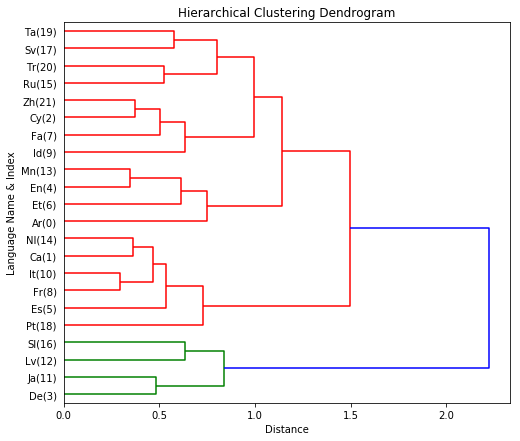

In [47]:
# Q3.3
def iaml01cw2_q3_3():
    Xmean1 = np.empty([0,26])
    for i in range(22):
        Xtrn_i = np.array(Xtrn[Ytrn == i])
        Xmean_i = np.mean(Xtrn_i,axis=0)
        Xmean1 = np.concatenate((Xmean1,Xmean_i.reshape(1,26)),axis=0)
    label = np.array(['Ar(0)','Ca(1)','Cy(2)','De(3)','En(4)','Es(5)','Et(6)','Fa(7)','Fr(8)','Id(9)','It(10)','Ja(11)','Lv(12)','Mn(13)','Nl(14)','Ru(15)','Sl(16)','Sv(17)','Pt(18)','Ta(19)','Tr(20)','Zh(21)'])
    plt.figure(figsize=(8,7))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Distance')
    plt.ylabel('Language Name & Index')
    Z=sch.ward(Xmean1)
    graph = sch.dendrogram(Z, orientation='right',labels=label)
    plt.savefig('3.3.pdf')
iaml01cw2_q3_3()

Q3.4

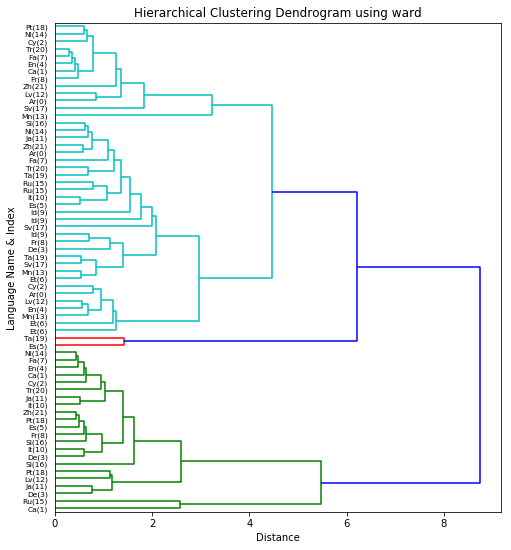

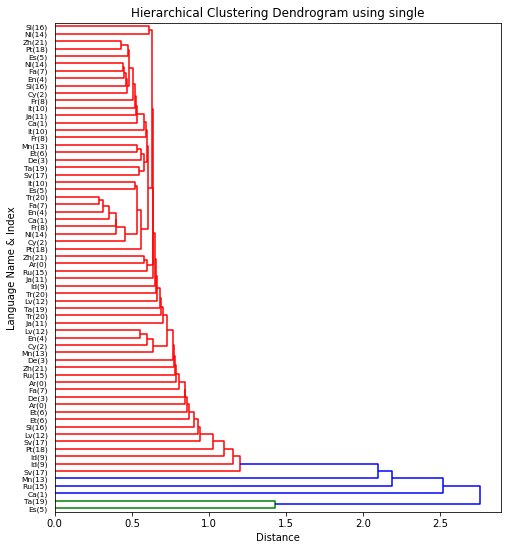

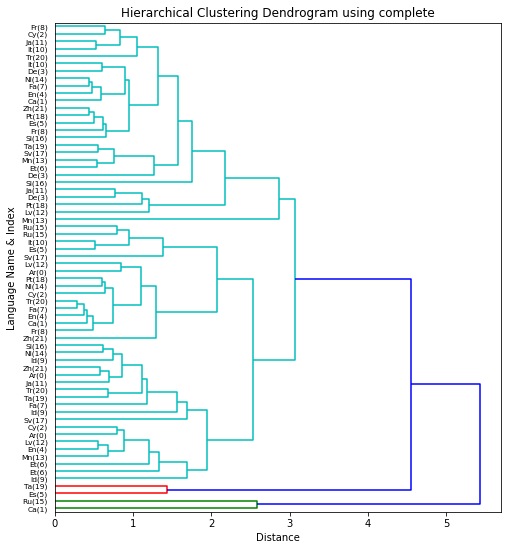

In [24]:
# Q3.4
def iaml01cw2_q3_4():
    X = np.empty([0,26])
    label = np.array(['Ar(0)','Ar(0)','Ar(0)','Ca(1)','Ca(1)','Ca(1)','Cy(2)','Cy(2)','Cy(2)','De(3)','De(3)','De(3)','En(4)','En(4)','En(4)','Es(5)','Es(5)','Es(5)','Et(6)','Et(6)','Et(6)','Fa(7)','Fa(7)','Fa(7)','Fr(8)','Fr(8)','Fr(8)','Id(9)','Id(9)','Id(9)','It(10)','It(10)','It(10)','Ja(11)','Ja(11)','Ja(11)','Lv(12)','Lv(12)','Lv(12)','Mn(13)','Mn(13)','Mn(13)','Nl(14)','Nl(14)','Nl(14)','Ru(15)','Ru(15)','Ru(15)','Sl(16)','Sl(16)','Sl(16)','Sv(17)','Sv(17)','Sv(17)','Pt(18)','Pt(18)','Pt(18)','Ta(19)','Ta(19)','Ta(19)','Tr(20)','Tr(20)','Tr(20)','Zh(21)','Zh(21)','Zh(21)'])
    for i in range(22):
        Xtrn_i = np.array(Xtrn[Ytrn == i])
        kmeans = KMeans(n_clusters=3, random_state=1).fit(Xtrn_i)
        X = np.concatenate((X,kmeans.cluster_centers_),axis=0)
    plt.figure(figsize=(8,9))
    plt.title('Hierarchical Clustering Dendrogram using ward')
    plt.xlabel('Distance')
    plt.ylabel('Language Name & Index')
    Z=sch.ward(X)
    graph = sch.dendrogram(Z, orientation='right',leaf_font_size = 10,labels=label)
    ax = plt.gca()
    ax.tick_params(axis='y', which='major', labelsize=7.5)
    plt.savefig('3.4ward.pdf',bbox_inches='tight')
    plt.figure(figsize=(8,9))
    plt.title('Hierarchical Clustering Dendrogram using single')
    plt.xlabel('Distance')
    plt.ylabel('Language Name & Index')
    Z=sch.single(X)
    graph = sch.dendrogram(Z, orientation='right',leaf_font_size = 10,labels=label)
    ax = plt.gca()
    ax.tick_params(axis='y', which='major', labelsize=7.5)
    plt.savefig('3.4single.pdf',bbox_inches='tight')
    plt.figure(figsize=(8,9))
    plt.title('Hierarchical Clustering Dendrogram using complete')
    plt.xlabel('Distance')
    plt.ylabel('Language Name & Index')
    Z=sch.complete(X)
    graph = sch.dendrogram(Z, orientation='right',leaf_font_size = 10,labels=label)
    ax = plt.gca()
    ax.tick_params(axis='y', which='major', labelsize=7.5)
    plt.savefig('3.4complete.pdf',bbox_inches='tight')
iaml01cw2_q3_4()

Q3.5

K = 1, testing data = Xtrn, matrix type = full, score = 16.39360043614829
K = 1, testing data = Xtst, matrix type = full, score = 15.810511543142642
K = 1, testing data = Xtrn, matrix type = diag, score = 14.280416117561781
K = 1, testing data = Xtst, matrix type = diag, score = 13.842923924145325
K = 3, testing data = Xtrn, matrix type = full, score = 18.08600493814516
K = 3, testing data = Xtst, matrix type = full, score = 17.066076255632254
K = 3, testing data = Xtrn, matrix type = diag, score = 15.39842974321434
K = 3, testing data = Xtst, matrix type = diag, score = 15.040748265063943
K = 5, testing data = Xtrn, matrix type = full, score = 19.03572395191873
K = 5, testing data = Xtst, matrix type = full, score = 16.48942646374156
K = 5, testing data = Xtrn, matrix type = diag, score = 16.01038876179638
K = 5, testing data = Xtst, matrix type = diag, score = 15.908546100076153
K = 10, testing data = Xtrn, matrix type = full, score = 21.06202034162118
K = 10, testing data = Xtst, ma

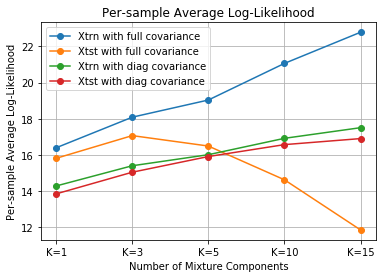

In [4]:
# Q3.5
def iaml01cw2_q3_5():
    Xtrn_0 = np.array(Xtrn[Ytrn == 0])
    Xtst_0 = np.array(Xtst[Ytst == 0])
    Xtrn_full = np.array([])
    Xtst_full = np.array([])
    Xtrn_diag = np.array([])
    Xtst_diag = np.array([])
    for i in [1,3,5,10,15]:
        a = GaussianMixture(n_components=i, covariance_type='full',random_state=1)
        a.fit(Xtrn_0)
        score1 = a.score(Xtrn_0)
        score2 = a.score(Xtst_0)
        Xtrn_full = np.append(Xtrn_full,score1)
        Xtst_full = np.append(Xtst_full,score2)
        print('K = %s, testing data = Xtrn, matrix type = full, score = %s'%(i,score1))
        print('K = %s, testing data = Xtst, matrix type = full, score = %s'%(i,score2))
        a.score(Xtst_0)
        b = GaussianMixture(n_components=i, covariance_type='diag',random_state=1)
        b.fit(Xtrn_0)
        b.score(Xtrn_0)
        b.score(Xtst_0)
        score3 = b.score(Xtrn_0)
        score4 = b.score(Xtst_0)
        Xtrn_diag = np.append(Xtrn_diag,score3)
        Xtst_diag = np.append(Xtst_diag,score4)
        print('K = %s, testing data = Xtrn, matrix type = diag, score = %s'%(i,score3))
        print('K = %s, testing data = Xtst, matrix type = diag, score = %s'%(i,score4))
    plt.plot(Xtrn_full,'o-',label = 'Xtrn with full covariance')
    plt.plot(Xtst_full,'o-',label = 'Xtst with full covariance')
    plt.plot(Xtrn_diag,'o-',label = 'Xtrn with diag covariance')
    plt.plot(Xtst_diag,'o-',label = 'Xtst with diag covariance')
    plt.title('Per-sample Average Log-Likelihood')
    plt.xlabel('Number of Mixture Components')
    plt.ylabel('Per-sample Average Log-Likelihood')
    plt.xticks([0,1,2,3,4],['K=1', 'K=3', 'K=5', 'K=10', 'K=15'])
    plt.grid()
    plt.legend()
    plt.savefig('3.5.pdf')
iaml01cw2_q3_5()